# Overview
This project aims to provide analytic solutions for a transportation network company, Ultimate, to the following questions.
1. What are the underlying patterns of the demand with respect to time?
2. Construct an experiment to test whether a reimbursement plan to drivers would generate benefits.
3. Establish predictive models for retention. Discover what factors are the best predictors for retention of users. 
The data sets we have are logins.json(contains simulated timestamps of user logins) and ultimate_data_challenge.json(contains details on users regarding their riding experience).

## Exploratory    data    analysis  
The logins.json file contains (simulated) timestamps of user logins in a particular geographic location.     
Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of     login counts in ways     that    best     characterize     the  underlying    patterns     of     the    demand.     Please report/illustrate     important     features    of     the    demand,  such     as    daily     cycles.     If     there     are     data     quality     issues,    please     report     them. 


#### Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the dataset for a quick look

In [2]:
logins = pd.read_json('C:/Users/Weicong Su/Desktop/DataScience/1481053515_ultimate_challenge/ultimate_challenge/logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


#### The plan is to use aggregation. Before doing that, we store the time stamps in a new column and set the time stamps to be the index

In [4]:
logins['Time'] = logins.login_time
logins.head(10)

,login_time,Time
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37
3,1970-01-01 20:16:36,1970-01-01 20:16:36
4,1970-01-01 20:26:21,1970-01-01 20:26:21
5,1970-01-01 20:21:41,1970-01-01 20:21:41
6,1970-01-01 20:12:16,1970-01-01 20:12:16
7,1970-01-01 20:35:47,1970-01-01 20:35:47
8,1970-01-01 20:35:38,1970-01-01 20:35:38
9,1970-01-01 20:47:52,1970-01-01 20:47:52


In [5]:
logins = logins.set_index('login_time')

#### Aggregate the login_time based on a 15-min slot

In [6]:
logins.resample('15Min').count().head()

,Time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


#### Sort the time stamps to see the above gives the correct result 

In [7]:
logins.sort_values(by = 'Time').head(20)

,Time
login_time,
1970-01-01 20:12:16,1970-01-01 20:12:16
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:21:41,1970-01-01 20:21:41
1970-01-01 20:26:05,1970-01-01 20:26:05
1970-01-01 20:26:21,1970-01-01 20:26:21
1970-01-01 20:31:03,1970-01-01 20:31:03


#### Store the aggregation result in the new dataframe logins_count

In [8]:
logins_count = logins.resample('15Min').count()
logins_count = logins_count.reset_index()
logins_count = logins_count.rename(columns={'Time':'Count'})
logins_count.head(10)

,login_time,Count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


#### Plot the aggregation result

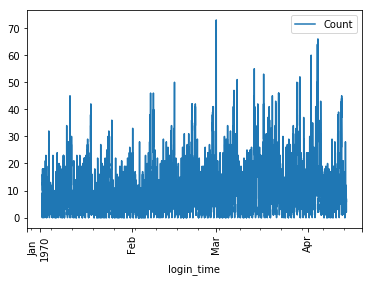

In [9]:
logins_count.plot('login_time','Count')
plt.xticks(rotation=90)
plt.show()

#### We can see that 
##### 1.March and April has relatively large volumes of consumers.
##### 2.The volumes of consumers follows a periodic pattern.
#### We are not able to see
##### 3.what the periodic pattern is like locally (in a small time scale).

(array([719171., 719185., 719199., 719213., 719227., 719241., 719255.,
        719269.]), <a list of 8 Text xticklabel objects>)

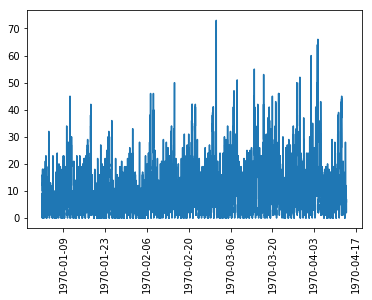

In [10]:
plt.plot(logins_count.login_time, logins_count.Count)
plt.xticks(rotation=90)

#### Shrink to smaller time scales to see the daily pattern.

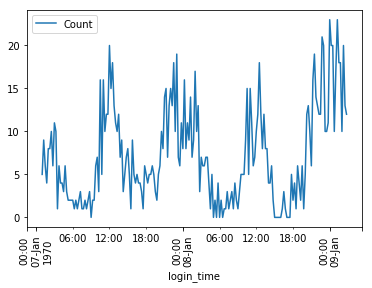

In [11]:
logins_count.iloc[500:700,].plot('login_time','Count')
plt.xticks(rotation=90)
plt.show()

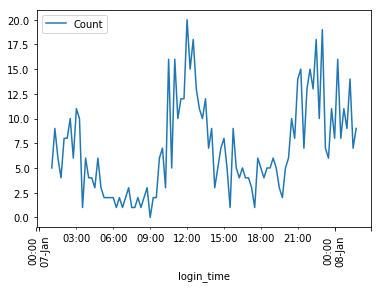

In [12]:
logins_count.iloc[500:600,].plot('login_time','Count')
plt.xticks(rotation=90)
plt.show()

#### The volumes of cosumers follows a daily pattern with 00:00 and 12:00 being the peaks.

## Experiment    and    metrics    design  
The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.
#### Our plan is to use the paired t-test to give statistical evidence that whether the reimbursement for toll costs will raise the volumes of consumers in both cities.

1. As a first step, we record 180 daily login counts before the reimbursement policy for both cities $x_{G,old,i}, i=1,2,...,180$, $x_{M,old,i}, i=1,2,...,180$ and 180 daily login counts after the reimbursement policy for both cities $x_{G,new,i}, i=181,182,...,360$, $x_{M,new,i}, i=181,182,...,360$.

2. We then calculate the sample mean and sample variance of the daily difference based on this 180-day scale for each city respetively.
$d_{G} = 1/180 \sum_{i=1}^{180} (x_{G,new,180+i} - x_{G,old,i})$
<br>
$s_{G} = 1/179 \sum_{i=1}^{180} (x_{G,new,180+i} - x_{G,old,i} - d_{G})$
<br>
$d_{M} = 1/180 \sum_{i=1}^{180} (x_{M,new,180+i} - x_{G,old,i})$
<br>
$s_{M} = 1/179 \sum_{i=1}^{180} (x_{M,new,180+i} - x_{G,old,i} - d_{M})$

3. Calculate the t-statistics for both cities based on a margin of $d_{1}$ and $d_{2}$. 
   <br>
   $t_{G} = \frac{d_{G}-d_{1}}{s_{G}/\sqrt{180}}$
   <br>
   $t_{M} = \frac{d_{G}-d_{2}}{s_{M}/\sqrt{180}}$

4. A size $\alpha$ test of $H_{0}:d_{G} \le d_{1}$ versus $H_{a}:d_{G} > d_{1}$ is to reject $H_{0}$ if $t_{G} \ge t_{1-\alpha}(179)$. If we reject $H_{0}$ as a result, this means we are confident that the reimbursement policy boost the average daily cosumer volumns by at least $d_{1}$ for the Gotham City at a confidence level of $100(1-\alpha)$ percentage points.
<br>
A size $\alpha$ test of $H_{0}:d_{M} \le d_{2}$ versus $H_{a}:d_{M} > d_{2}$ is to reject $H_{0}$ if $t_{M} \ge t_{1-\alpha}(179)$. If we reject $H_{0}$ as a result, this means we are confident that the reimbursement policy boost the average daily cosumer volumns by at least $d_{2}$ for the Metropolis City at a confidence level of $100(1-\alpha)$ percentage points.

5. If we want to see the result as a whole for both cities. We can record the daily login counts for both cities by $x_{total,old,i} = x_{G,old,i}+x_{M,old,i}, i=1,2,...,180$ and $x_{total,new,i} = x_{G,new,i}+x_{M,new,i}, i=181,182,...,360$. 
<br>
Then perform a similar paired t-test based on the old and new records.

#### Since we do not have data for comparison, we will not demonstrate the results.

## Predictive     modeling   
Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in 
January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like        to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate. 

#### pd.read_json fails

In [13]:
# data = pd.read_json('C:/Users/Weicong Su/Desktop/DataScience/1481053515_ultimate_challenge/ultimate_data_challenge.json')

#### Another way to load the file

In [14]:
import json
with open('C:/Users/Weicong Su/Desktop/DataScience/1481053515_ultimate_challenge/ultimate_data_challenge.json') as f:
   data = json.load(f)

#### Convert data to a pandas dataframe format

In [15]:
data = pd.DataFrame(data)
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


#### Q:What fraction of the observed users were retained(active in the first 30 days)?
#### A: 69.22% were retained.

In [16]:
len(data.loc[data.trips_in_first_30_days!=0])/len(data)

0.6922

#### We want to analyze what makes users retained in the 6th month. For this purpose, we first generate a boolean-valued column to indicate if a user is retained in the 6th month. 

In [17]:
data['retained_in_the_6th_month'] = data.last_trip_date >= '2014-06-01'

In [18]:
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False


#### It is tempting to believe by looking at the first 10 records that 'ultimate_black_user' is the perfect indicator of 'retained_in_the_6th_month'. The following shows this is not the case.

In [19]:
len(data.loc[data.ultimate_black_user!=data.retained_in_the_6th_month])

18664

#### Convert boolean values to 1/0

In [20]:
data.ultimate_black_user = data.ultimate_black_user.astype(float)
data.retained_in_the_6th_month = data.retained_in_the_6th_month.astype(float)
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1.0,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0.0,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0.0,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1.0,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0.0,82.4,0.0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,1.0,100.0,1.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,0.0,100.0,0.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,0.0,100.0,0.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,0.0,100.0,0.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,0.0,0.0,0.0


#### The column 'phone' is binary. We will convert the values in 'phone' to 1/0.

In [21]:
data.phone.value_counts(dropna=False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [22]:
data.phone = data.phone.replace('iPhone',1.0)
data.phone = data.phone.replace('Android',0.0)
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,1.0,2014-01-25,15.4,4,1.0,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,0.0,2014-01-29,0.0,0,0.0,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,1.0,2014-01-06,0.0,3,0.0,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,1.0,2014-01-10,20.0,9,1.0,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,0.0,2014-01-27,11.8,14,0.0,82.4,0.0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,1.0,2014-01-09,0.0,2,1.0,100.0,1.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,0.0,2014-01-24,0.0,1,0.0,100.0,0.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,1.0,2014-01-28,0.0,2,0.0,100.0,0.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,0.0,2014-01-21,0.0,2,0.0,100.0,0.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,0.0,2014-01-03,0.0,1,0.0,0.0,0.0


In [23]:
396/len(data)

0.00792

#### For users with NaN values in 'phone', we do not know which phone the user is using. We might as well drop the records without the phone information. We will miss less than 0.8% of data. We will drop records with NaNs in the end.

#### No missing data for 'city'. We will use one_hot_encoding to impute this column. 

In [24]:
data.city.value_counts(dropna=False)

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [25]:
data = pd.concat([data, pd.get_dummies(data.city,prefix='city')],axis=1)
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,1.0,2014-01-25,15.4,4,1.0,46.2,1.0,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,0.0,2014-01-29,0.0,0,0.0,50.0,0.0,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,1.0,2014-01-06,0.0,3,0.0,100.0,0.0,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,1.0,2014-01-10,20.0,9,1.0,80.0,1.0,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,0.0,2014-01-27,11.8,14,0.0,82.4,0.0,0,0,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,1.0,2014-01-09,0.0,2,1.0,100.0,1.0,0,0,1
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,0.0,2014-01-24,0.0,1,0.0,100.0,0.0,1,0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,1.0,2014-01-28,0.0,2,0.0,100.0,0.0,0,0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,0.0,2014-01-21,0.0,2,0.0,100.0,0.0,0,0,1
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,0.0,2014-01-03,0.0,1,0.0,0.0,0.0,0,0,1


#### After the imputation, we do not need the 'city' column any more. So it will be dropped.

In [26]:
data = data.drop(columns=['city'])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,1.0,2014-01-25,15.4,4,1.0,46.2,1.0,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,0.0,2014-01-29,0.0,0,0.0,50.0,0.0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,1.0,2014-01-06,0.0,3,0.0,100.0,0.0,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,1.0,2014-01-10,20.0,9,1.0,80.0,1.0,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,0.0,2014-01-27,11.8,14,0.0,82.4,0.0,0,0,1


#### Impute empty values in 'avg_ratings_of_driver' by the average of existing values.

In [27]:
np.nanmean(data.avg_rating_of_driver)

4.601559291274655

In [28]:
np.mean(data.avg_rating_of_driver)

4.601559291274655

#### The following sums up all the existing values and divide the sum by the length of existing values. It gives the same result as the above two commands.

In [29]:
np.sum(data[~data.avg_rating_of_driver.isnull()].avg_rating_of_driver)/(len(data)-len(data[data.avg_rating_of_driver.isnull()]))

4.601559291274655

In [30]:
data.avg_rating_of_driver.fillna(np.mean(data.avg_rating_of_driver),inplace=True)
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.700000,1.10,2014-06-17,1.0,2014-01-25,15.4,4,1.0,46.2,1.0,0,1,0
1,8.26,5.0,5.000000,1.00,2014-05-05,0.0,2014-01-29,0.0,0,0.0,50.0,0.0,1,0,0
2,0.77,5.0,4.300000,1.00,2014-01-07,1.0,2014-01-06,0.0,3,0.0,100.0,0.0,1,0,0
3,2.36,4.9,4.600000,1.14,2014-06-29,1.0,2014-01-10,20.0,9,1.0,80.0,1.0,0,1,0
4,3.13,4.9,4.400000,1.19,2014-03-15,0.0,2014-01-27,11.8,14,0.0,82.4,0.0,0,0,1
5,10.56,5.0,3.500000,1.00,2014-06-06,1.0,2014-01-09,0.0,2,1.0,100.0,1.0,0,0,1
6,3.95,4.0,4.601559,1.00,2014-01-25,0.0,2014-01-24,0.0,1,0.0,100.0,0.0,1,0,0
7,2.04,5.0,5.000000,1.00,2014-01-29,1.0,2014-01-28,0.0,2,0.0,100.0,0.0,0,0,1
8,4.36,5.0,4.500000,1.00,2014-02-01,0.0,2014-01-21,0.0,2,0.0,100.0,0.0,0,0,1
9,2.37,5.0,4.601559,1.00,2014-01-05,0.0,2014-01-03,0.0,1,0.0,0.0,0.0,0,0,1


#### No empty data in 'avg_rating_of_driver' any more.

In [31]:
len(data[data.avg_rating_of_driver.isnull()])

0

#### No empty data in 'avg_dist'

In [32]:
len(data[data.avg_dist.isnull()])

0

#### We need to impute the empty data in 'avg_rating_by_driver'

In [33]:
len(data[data.avg_rating_by_driver.isnull()])

201

#### Again we use the average of existing values to do imputation.

In [34]:
data.avg_rating_by_driver.fillna(np.mean(data.avg_rating_by_driver),inplace=True)

#### No empty data in 'avg_surge'

In [35]:
len(data[data.avg_surge.isnull()])

0

#### Replace values in 'last_trip_date' and 'signup_date' to numbers of days by the approximation formula:
#### NumofDays = 30*Month+Day

In [36]:
from datetime import datetime
dates = [d.date() for d in pd.to_datetime(data.last_trip_date)]
data['last_trip_day']=30*np.array([d.month for d in dates])+np.array([d.day for d in dates])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell,last_trip_day
0,3.67,5.0,4.7,1.10,2014-06-17,1.0,2014-01-25,15.4,4,1.0,46.2,1.0,0,1,0,197
1,8.26,5.0,5.0,1.00,2014-05-05,0.0,2014-01-29,0.0,0,0.0,50.0,0.0,1,0,0,155
2,0.77,5.0,4.3,1.00,2014-01-07,1.0,2014-01-06,0.0,3,0.0,100.0,0.0,1,0,0,37
3,2.36,4.9,4.6,1.14,2014-06-29,1.0,2014-01-10,20.0,9,1.0,80.0,1.0,0,1,0,209
4,3.13,4.9,4.4,1.19,2014-03-15,0.0,2014-01-27,11.8,14,0.0,82.4,0.0,0,0,1,105


In [37]:
dates = [d.date() for d in pd.to_datetime(data.signup_date)]
data['signup_day']=30*np.array([d.month for d in dates])+np.array([d.day for d in dates])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell,last_trip_day,signup_day
0,3.67,5.0,4.7,1.10,2014-06-17,1.0,2014-01-25,15.4,4,1.0,46.2,1.0,0,1,0,197,55
1,8.26,5.0,5.0,1.00,2014-05-05,0.0,2014-01-29,0.0,0,0.0,50.0,0.0,1,0,0,155,59
2,0.77,5.0,4.3,1.00,2014-01-07,1.0,2014-01-06,0.0,3,0.0,100.0,0.0,1,0,0,37,36
3,2.36,4.9,4.6,1.14,2014-06-29,1.0,2014-01-10,20.0,9,1.0,80.0,1.0,0,1,0,209,40
4,3.13,4.9,4.4,1.19,2014-03-15,0.0,2014-01-27,11.8,14,0.0,82.4,0.0,0,0,1,105,57


#### No empty data in 'last_trip_day' and 'signup_day'

In [38]:
len(data[data.last_trip_day.isnull()])
len(data[data.signup_day.isnull()])

0

#### We can drop original columns 'last_trip_date' and 'signup_date'

In [39]:
data = data.drop(columns=['last_trip_date','signup_date'])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell,last_trip_day,signup_day
0,3.67,5.0,4.7,1.10,1.0,15.4,4,1.0,46.2,1.0,0,1,0,197,55
1,8.26,5.0,5.0,1.00,0.0,0.0,0,0.0,50.0,0.0,1,0,0,155,59
2,0.77,5.0,4.3,1.00,1.0,0.0,3,0.0,100.0,0.0,1,0,0,37,36
3,2.36,4.9,4.6,1.14,1.0,20.0,9,1.0,80.0,1.0,0,1,0,209,40
4,3.13,4.9,4.4,1.19,0.0,11.8,14,0.0,82.4,0.0,0,0,1,105,57


#### No empty data in 'surge_pct' (we still have empty data in 'phone' which will be taken care of later)

In [40]:
len(data[data.surge_pct.isnull()])

0

#### No empty data in 'trips_in_first_30_days'

In [41]:
len(data[data.trips_in_first_30_days.isnull()])

0

#### No empty data in 'ultimate_black_user'

In [42]:
len(data[data.ultimate_black_user.isnull()])

0

#### No empty data in 'weekday_pct'

In [43]:
len(data[data.weekday_pct.isnull()])

0

#### Only 'phone' has empty data, we will drop the rows with empty data, missing <0.8% data.

In [44]:
l1 = len(data)
data = data.dropna()
l2 = len(data)
l2/l1

0.99208

#### We plan to use logistic regression and support vector machines to establish predictive models to predict whether or not a user is active in the 6th month. Since both of these models is numerically sensitive, we will scale the values of each column to a range from 0 to 1. 

In [45]:
for column in data.columns:
    data[str(column)] = data[str(column)]/max(data[str(column)])

In [46]:
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_in_the_6th_month,city_Astapor,city_King's Landing,city_Winterfell,last_trip_day,signup_day
0,0.022801,1.00,0.940000,0.13750,1.0,0.154,0.032,1.0,0.462,1.0,0.0,1.0,0.0,0.933649,0.901639
1,0.051317,1.00,1.000000,0.12500,0.0,0.000,0.000,0.0,0.500,0.0,1.0,0.0,0.0,0.734597,0.967213
2,0.004784,1.00,0.860000,0.12500,1.0,0.000,0.024,0.0,1.000,0.0,1.0,0.0,0.0,0.175355,0.590164
3,0.014662,0.98,0.920000,0.14250,1.0,0.200,0.072,1.0,0.800,1.0,0.0,1.0,0.0,0.990521,0.655738
4,0.019446,0.98,0.880000,0.14875,0.0,0.118,0.112,0.0,0.824,0.0,0.0,0.0,1.0,0.497630,0.934426
5,0.065606,1.00,0.700000,0.12500,1.0,0.000,0.016,1.0,1.000,1.0,0.0,0.0,1.0,0.881517,0.639344
6,0.024540,0.80,0.920312,0.12500,0.0,0.000,0.008,0.0,1.000,0.0,1.0,0.0,0.0,0.260664,0.885246
7,0.012674,1.00,1.000000,0.12500,1.0,0.000,0.016,0.0,1.000,0.0,0.0,0.0,1.0,0.279621,0.950820
8,0.027087,1.00,0.900000,0.12500,0.0,0.000,0.016,0.0,1.000,0.0,0.0,0.0,1.0,0.289100,0.836066
9,0.014724,1.00,0.920312,0.12500,0.0,0.000,0.008,0.0,0.000,0.0,0.0,0.0,1.0,0.165877,0.540984


#### Q:What fraction of the observed users were retained(active) in the 6th month?
#### A: 37.64% were retained.

In [47]:
len(data.loc[data.retained_in_the_6th_month == 1])/len(data)

0.37640109668575117

#### The data set is imbalanced but we have ways to deal with this issue in logistic regression and SVM. 

In [48]:
X = data.drop(columns = ['retained_in_the_6th_month'])
y = data.retained_in_the_6th_month
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
# setting class_weight='balanced' takes care of the issue of imbalance data
# for reference, see https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/ 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_pred,y_test)
print(cm_svc)

[[6072   25]
 [  91 3733]]


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
log = LogisticRegression(class_weight='balanced')
#log = LogisticRegression()
log.fit(X_train,y_train)
THRESHOLD = 0.5
y_pred = np.where(log.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm_log = confusion_matrix(y_pred,y_test)
print(cm_log)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[6011   25]
 [ 152 3733]]


C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01946779 0.01373183 0.01233704 0.01059355 0.02321629 0.01448773
 0.01870103 0.02108988 0.03533089 0.00892621 0.02682047 0.00306818
 0.77609619 0.01613291]


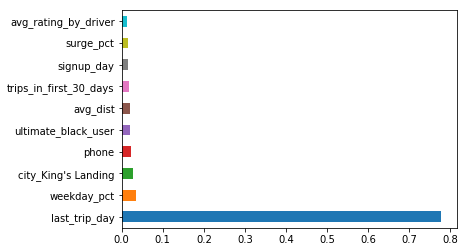

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Last_trip_day is highly relevant to whether or not a user is active in the 6th month. Actually we almost only need to see the last trip date of a user to determine if he/she will be active in the 6th month.
#### We will remove 'last_trip_day' in the feature set.

In [52]:
X = data.drop(columns = ['retained_in_the_6th_month','last_trip_day'])
y = data.retained_in_the_6th_month
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Support Vector Machine Classifier

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
# setting class_weight='balanced' takes care of the issue of imbalance data
# for reference, see https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/ 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_pred,y_test)
print(cm_svc)

[[4467 1319]
 [1696 2439]]


#### Linear Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
log = LogisticRegression(class_weight='balanced')
#log = LogisticRegression()
log.fit(X_train,y_train)
THRESHOLD = 0.6
y_pred = np.where(log.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm_log = confusion_matrix(y_pred,y_test)
print(cm_log)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5138 1809]
 [1025 1949]]


#### The prediction power is much smaller without 'last_trip_day'. This could due to the noise introduced by irrelevant features. We will do feature selections before training models. Some feature selection methods are listed below.

#### https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

#### 1.Feature importance based on information gain in tree-based models.

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.1928946  0.09144421 0.08453789 0.05300578 0.0451042  0.05396333
 0.09606093 0.03500464 0.1497325  0.01333833 0.05268371 0.00777167
 0.1244582 ]


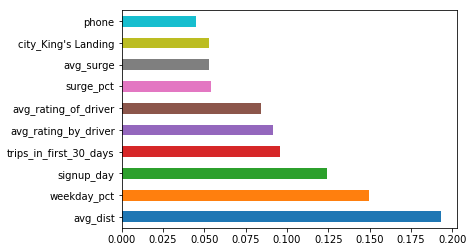

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Feature selection based on the chi-square test on dependency.

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
10     city_King's Landing  2722.297257
7      ultimate_black_user  1323.342938
9             city_Astapor  1017.488909
4                    phone   775.089196
6   trips_in_first_30_days   111.056747
11         city_Winterfell    57.008772
0                 avg_dist    14.497270
5                surge_pct     2.842984
8              weekday_pct     1.042281
12              signup_day     0.555384


#### Select top 10 features based on the chi-square test

In [57]:
X = data.iloc[:,[10,7,9,4,6,11,0,5,8,12]]
y = data.retained_in_the_6th_month
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
log = LogisticRegression(class_weight='balanced')
log.fit(X_train,y_train)
THRESHOLD = 0.6
y_pred = np.where(log.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm_log = confusion_matrix(y_pred,y_test)
acc_log = accuracy_score(y_pred,y_test)
recall_log = recall_score(y_pred,y_test)
roc_auc_log = roc_auc_score(y_pred,y_test)
precision_score_log = precision_score(y_pred,y_test)
print('The confusion matrix is \n', cm_log)
print('True Negative = ', cm_log[0,0])
print('True Positive = ', cm_log[1,1])
print('False Negative = ', cm_log[1,0])
print('False Positive = ', cm_log[0,1])
# Souce Code for confusion matrix: 
# https://github.com/scikit-learn/scikit-learn/blob/b7b4d3e2f/sklearn/metrics/classification.py#L187
print('The accuracy score is ', acc_log)
print('The recall score is ', recall_log)
print('The roc_auc_score is ', roc_auc_log)
print('The precision_score is ', precision_score_log)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The confusion matrix is 
 [[6163    0]
 [   0 3758]]
True Negative =  6163
True Positive =  3758
False Negative =  0
False Positive =  0
The accuracy score is  1.0
The recall score is  1.0
The roc_auc_score is  1.0
The precision_score is  1.0


#### Support Vector Machine Classifier

In [63]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0) 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm_svc = confusion_matrix(y_pred,y_test)
acc_svc = accuracy_score(y_pred,y_test)
recall_svc = recall_score(y_pred,y_test)
roc_auc_svc = roc_auc_score(y_pred,y_test)
precision_score_svc = precision_score(y_pred,y_test)
print('The confusion matrix is \n', cm_svc)
print('True Negative = ', cm_svc[0,0])
print('True Positive = ', cm_svc[1,1])
print('False Negative = ', cm_svc[1,0])
print('False Positive = ', cm_svc[0,1])
print('The accuracy score is ', acc_svc)
print('The recall score is ', recall_svc)
print('The roc_auc_score is ', roc_auc_svc)
print('The precision_score is ', precision_score_svc)


The confusion matrix is 
 [[6163    0]
 [   0 3758]]
True Negative =  6163
True Positive =  3758
False Negative =  0
False Positive =  0
The accuracy score is  1.0
The recall score is  1.0
The roc_auc_score is  1.0
The precision_score is  1.0


#### After the feature selection based on the chi-squared test, both logistic regression and SVM classifier does very well on predicting whether or not a user tends to be retained in the 6th month.

### Conclusion:
#### The top-10 factors (from the most important to the least important) to indicate retention of users (in the 6th month) are
1.city_King's Landing  (whether the user is in the city of King's Landing)
<br>
2.ultimate_black_user  (whether the user took an Ultimate Black in the first 30 days)
<br>
3.city_Astapor  (whether the user is in the city of Astapor)
<br>
4.phone   (Android/Iphone)
<br>
5.trips_in_first_30_days (the number of trips the user took in the first 30 days after signing up)  
6.city_Winterfell    (whether the user is in the city of King's Landing)
<br>
7.avg_dist   (the average surge multiplier over all of the user's trips)
<br>
8.surge_pct  (the percent of trips taken with surge multiplier > 1)    
9.weekday_pct (the percent of the user's trips occurring during a weekday)    
10.signup_day (signup_date)
#### To predict retention (in the 6th month), please provide the above information of a user. The data will then be fed into our logistic regression model or the SVM classifer model to give a prediction result (1:Yes, 0:No).